In [1]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
lunches <- read.csv("lunch.csv", na.strings="")

In [3]:
head(lunches)

FY,COUNTY,CODISTSCH,DISTRICTLNAME,TOTAL,FREELUNCH,REDUCEDLUNCH,FREEREDUCEDLUNCH,PERCENT
2017-2018,ADAMS,10003000,KENESAW PUBLIC SCHOOLS,271,54,24,78,28.78
2017-2018,ADAMS,10018000,HASTINGS PUBLIC SCHOOLS,3740,1828,437,2265,60.56
2017-2018,ADAMS,10090000,ADAMS CENTRAL PUBLIC SCHOOLS,921,120,69,189,20.52
2017-2018,ADAMS,10123000,SILVER LAKE PUBLIC SCHOOLS,255,65,41,106,41.57
2017-2018,ADAMS,10701000,CHRIST LUTHERAN ELEMENTARY SCH,56,NA,NA,10,17.86
2017-2018,ADAMS,10702000,HASTINGS CATHOLIC SCHOOLS,474,40,26,66,13.92


In [4]:
schools <- lunches %>% na.omit()

In [5]:
head(schools)

,FY,COUNTY,CODISTSCH,DISTRICTLNAME,TOTAL,FREELUNCH,REDUCEDLUNCH,FREEREDUCEDLUNCH,PERCENT
1,2017-2018,ADAMS,10003000,KENESAW PUBLIC SCHOOLS,271,54,24,78,28.78
2,2017-2018,ADAMS,10018000,HASTINGS PUBLIC SCHOOLS,3740,1828,437,2265,60.56
3,2017-2018,ADAMS,10090000,ADAMS CENTRAL PUBLIC SCHOOLS,921,120,69,189,20.52
4,2017-2018,ADAMS,10123000,SILVER LAKE PUBLIC SCHOOLS,255,65,41,106,41.57
6,2017-2018,ADAMS,10702000,HASTINGS CATHOLIC SCHOOLS,474,40,26,66,13.92
8,2017-2018,ANTELOPE,20009000,NELIGH-OAKDALE SCHOOLS,383,112,43,155,40.47


In [6]:
str(schools)

'data.frame':	1451 obs. of  9 variables:
 $ FY              : Factor w/ 5 levels "2013-2014","2014-2015",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ COUNTY          : Factor w/ 93 levels "ADAMS","ANTELOPE",..: 1 1 1 1 1 2 2 2 4 5 ...
 $ CODISTSCH       : int  10003000 10018000 10090000 10123000 10702000 20009000 20018000 22001000 40001000 50071000 ...
 $ DISTRICTLNAME   : Factor w/ 810 levels "ADAMS CENTRAL PUBLIC SCHOOLS",..: 327 274 1 580 272 438 190 436 47 557 ...
 $ TOTAL           : int  271 3740 921 255 474 383 170 448 150 90 ...
 $ FREELUNCH       : int  54 1828 120 65 40 112 66 141 73 33 ...
 $ REDUCEDLUNCH    : int  24 437 69 41 26 43 21 69 18 12 ...
 $ FREEREDUCEDLUNCH: int  78 2265 189 106 66 155 87 210 91 45 ...
 $ PERCENT         : num  28.8 60.6 20.5 41.6 13.9 ...
 - attr(*, "na.action")=Class 'omit'  Named int [1:756] 5 7 10 11 13 19 22 33 34 35 ...
  .. ..- attr(*, "names")= chr [1:756] "5" "7" "10" "11" ...


In [7]:
library(ggplot2)

In [12]:
counties <- schools %>%
  group_by(COUNTY) %>%
  summarise(
    count = n(),
  ) %>% arrange(desc(count)) %>%
  filter(count > 10) %>% mutate(COUNTY = factor(COUNTY, COUNTY))

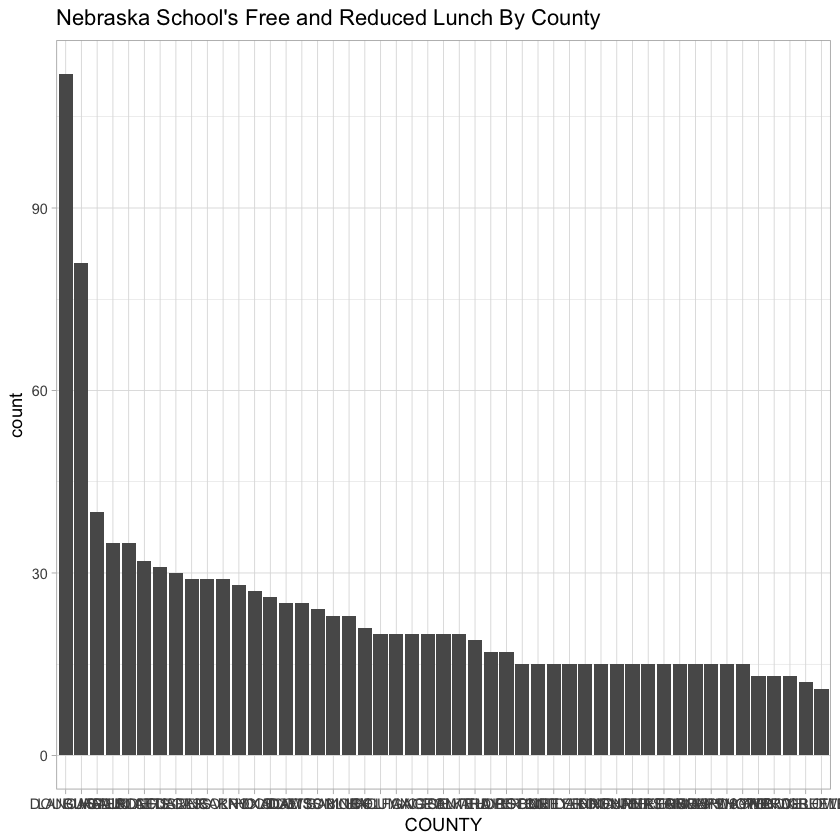

In [13]:
ggplot(counties, aes(COUNTY, weight=count)) + geom_bar() + ggtitle("Nebraska School's Free and Reduced Lunch By County") + 
     theme(plot.title = element_text(lineheight=.8, face="bold")) + theme_light()

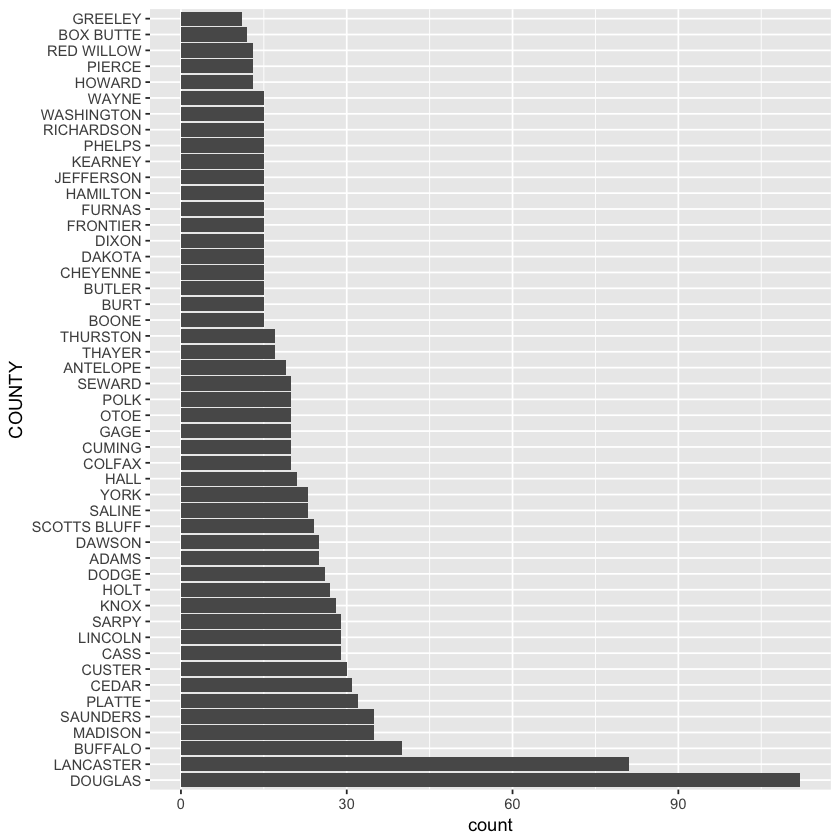

In [14]:
ggplot(counties, aes(COUNTY, weight=count)) + geom_bar() + coord_flip()

In [16]:
lunch <- filter(lunches, COUNTY == "DOUGLAS")

In [23]:
lunch %>% 
group_by(DISTRICTLNAME) %>%
summarize(
       total=sum(PERCENT)) %>%
select(DISTRICTLNAME, total) %>% 
filter(total != 0)

DISTRICTLNAME,total
ALL SAINTS CATHOLIC SCHOOL,75.00
BENNINGTON PUBLIC SCHOOLS,36.37
BENNINGTON PUBLIC SCHOOLS,9.86
CHRIST THE KING CATHOLIC SCH,21.33
CHRIST THE KING CATHOLIC SCH,4.73
CONCORDIA LUTHERAN SCHOOLS OF OMAHA,9.80
CONCORDIA LUTHERAN SCHOOLS OF OMAHA,3.64
DOUGLAS CO WEST COMMUNITY SCHS,169.34
ELKHORN PUBLIC SCHOOLS,28.81
ELKHORN PUBLIC SCHOOLS,7.44


In [32]:
oma <- filter(lunches, COUNTY == "DOUGLAS")

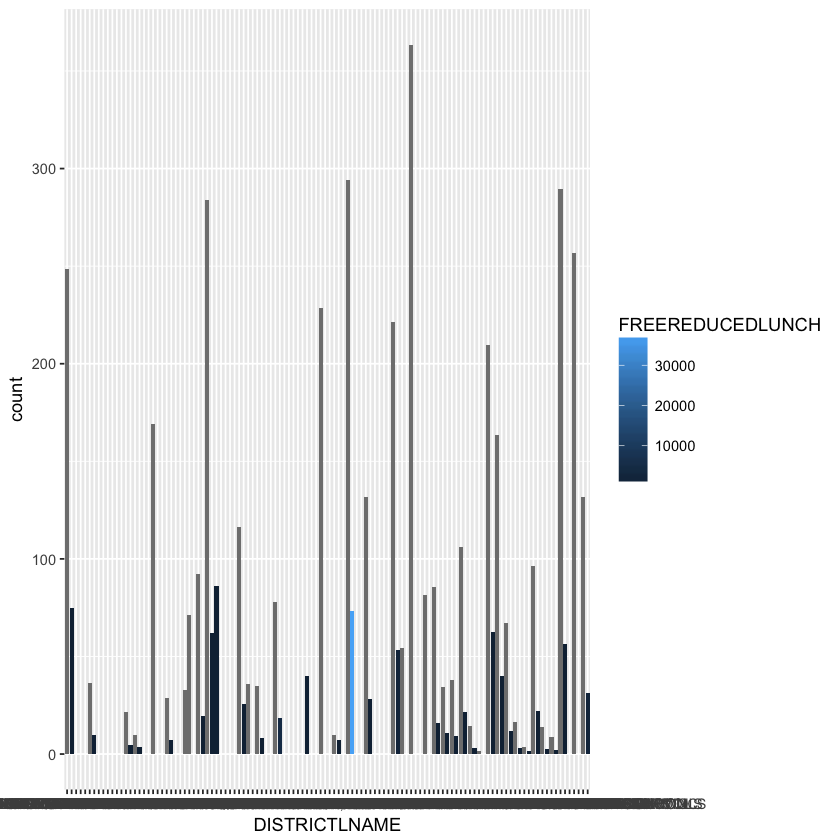

In [44]:
ggplot(oma, aes(DISTRICTLNAME, weight=PERCENT, fill=FREEREDUCEDLUNCH)) + geom_bar() + scale_color_brewer("lunch percent")


In [87]:
largest <- filter(lunches, PERCENT > 65.00)

# Nebraska's geographical dependence on free or reduced lunch

Nebraska has had a growing rate of children in the free or reduced lunch program both within public and private schools. Based off Nebraska's education data a large portion of children in the free or reduced lunch program are elementary age; however the data does not break major school districts, such as OPS, into individual education levels and schools within the district. This limits the ability to track the growth rate over education level and or schools geographic relation to known average income levels by area and housing developements.

While the data has limits it also tells a story not instantly caught by those outside of the free or reduced lunch "hot spots."  Although Nebraska is known for its fair economic and employment level, our free and reduced lunch program is growing.  

### **_With the growing consern surrounding the United States Census changes this raises the question, will Nebraska counties with growing amounts of children in the free or reduced lunch program be directly effected?_**###

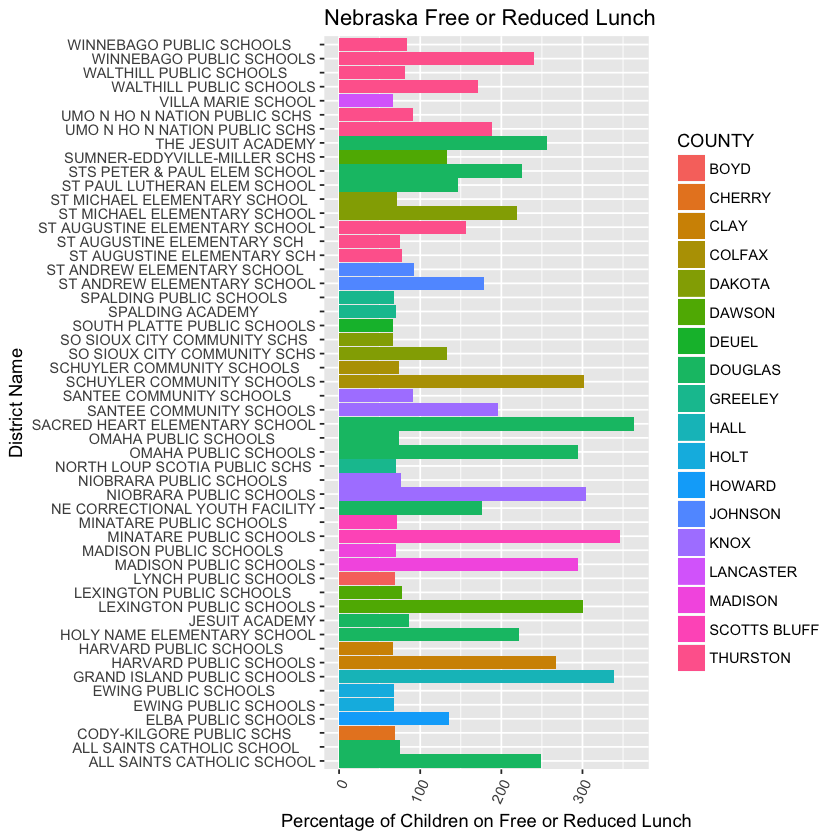

In [113]:
ggplot(largest, aes(DISTRICTLNAME, weight=PERCENT, fill=COUNTY)) + geom_bar(width = 0.95) + theme(axis.text.x = element_text(angle = 65, hjust = 1)) + labs(title= "Nebraska Free or Reduced Lunch", x= "District Name", y = "Percentage of Children on Free or Reduced Lunch" ) + coord_flip()

The 3 counties with the largest percent of children on free or reduced lunch are; Douglas, Hall and Thurston.  Douglas incompases Nebraska's largest metropolitan area made up of Omaha, Ralston, Millard, LaVista and the Coucil Bluff/Downtown Omaha boarder.  Because Douglas county encompases so many areas of Omaha it makes sense that it has the largest amount of children on free and reduced lunch.  Unless you are extreamly fimilar with the geographical locations of Nebraksa's counties, a first glace would not reveal much about why Hall and Thurston have close to equally competeing amounts of children on free and reduced lunch.

In [92]:
loma <-filter(oma, PERCENT > 65.00)

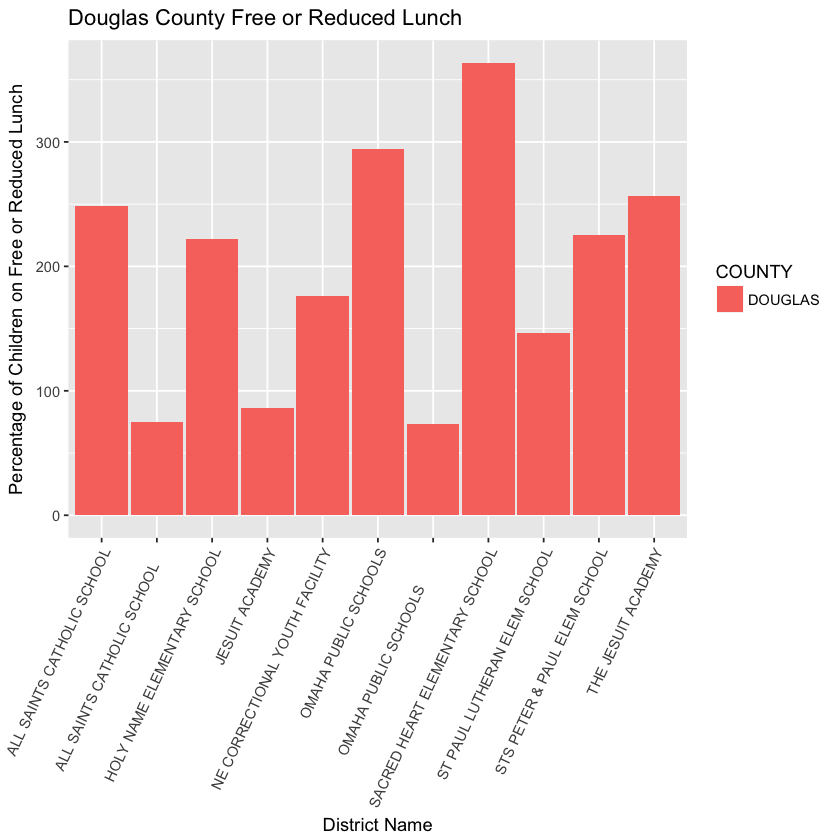

In [117]:
ggplot(loma, aes(DISTRICTLNAME, weight=PERCENT, fill=COUNTY)) + geom_bar(width = 0.95) + theme(axis.text.x = element_text(angle = 65, hjust = 1)) + labs(title= "Douglas County Free or Reduced Lunch", x= "District Name", y = "Percentage of Children on Free or Reduced Lunch" ) 

Because Douglas encompasses a large area of Nebraska's Metro and primarily "urban" area it makes sense this county would have the largest amount of children within the free or reduced lunch program.  The most surprising part about Dougla's counties district breakdown however is how low Omaha Public Schools (OPS) is in comparison to the other schools listed.  OPS is the largest school district in Omaha accounting for around 107 schools, to put that number into perspective Lincoln Public schools has around 72 and other Omaha Metro Schools such as Millard, Bellevue have around 22-37. While you need to take into account this is the data is meaured by the percentage of children withtin the district and OPS having the largest will have a much harder to measure marginal breakdown it is still surprising a single elementary school would rank higher in percentage then an entire decently sized district.

#### _Geographical importance:_ ### 

Sacred Heart Elementary School is located in North Omaha, one of the poorest neighborhoods in Omaha. Unlike most public schools in Omaha Sacred Heart is a faith based school for children ages K- 8th Grade which focus purly on the urban neighborhood surrounding the school.  The classroom setting is different in that there is a single classroom for each grade level with a direct focus on giving children the education they deserve regardless of the factors facing children in this area.

In [ ]:
Douglas encompases a sizable portion of the Omaha, Council Bluffs Metro. 

In [119]:
hall <- filter(lunches, COUNTY == "HALL")

In [128]:
lhall <-filter(hall, PERCENT > 40.00)

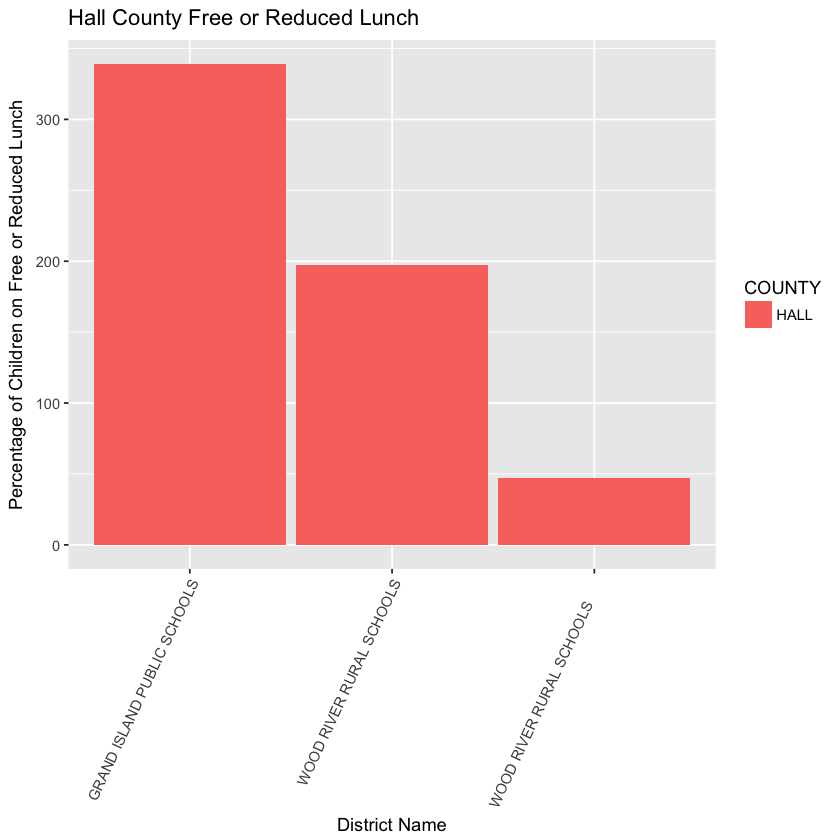

In [129]:
ggplot(lhall, aes(DISTRICTLNAME, weight=PERCENT, fill=COUNTY)) + geom_bar(width = 0.95) + theme(axis.text.x = element_text(angle = 65, hjust = 1)) + labs(title= "Hall County Free or Reduced Lunch", x= "District Name", y = "Percentage of Children on Free or Reduced Lunch" ) 

Grand Island's free or reduced lunch percentages can largely be contributed to the influx of hispanic immigrants within the last decade. This is not to say the increase is all due to hispanic immigrants however as not all fall under the finanical assistance level, but have largly populated Hall county within the last decade due to job oppertunities in production, contruction and agriculture.  

#### _This is where the US Census question begins to come into play.  With such a large population of immigrants within the free or reduced lunch program in Hall county Nebraska, how many are legal citizens whom will be accounted for in funding?_ ####

Nebraska is different in the national average in that our property tax make up close to 50% of k - 12th grade education funding.  A common misconception American's have about undocumented or "illegal" citizens is that they do not pay this portion of taxes and therefor are "living off the system." This is ignorant and not correct, non-US citizens still pay a portion of taxes towards education and other government services and therefor have a hat in this ring. _This means while a half of educational funding is guarenteed lack of undocumented citizens being accounted for in national funding could still provide a serious crimp in assistace to Hall County._

In [110]:
thu <- filter(lunches, COUNTY == "THURSTON")

In [124]:
lthu <-filter(thu, PERCENT > 65.00)

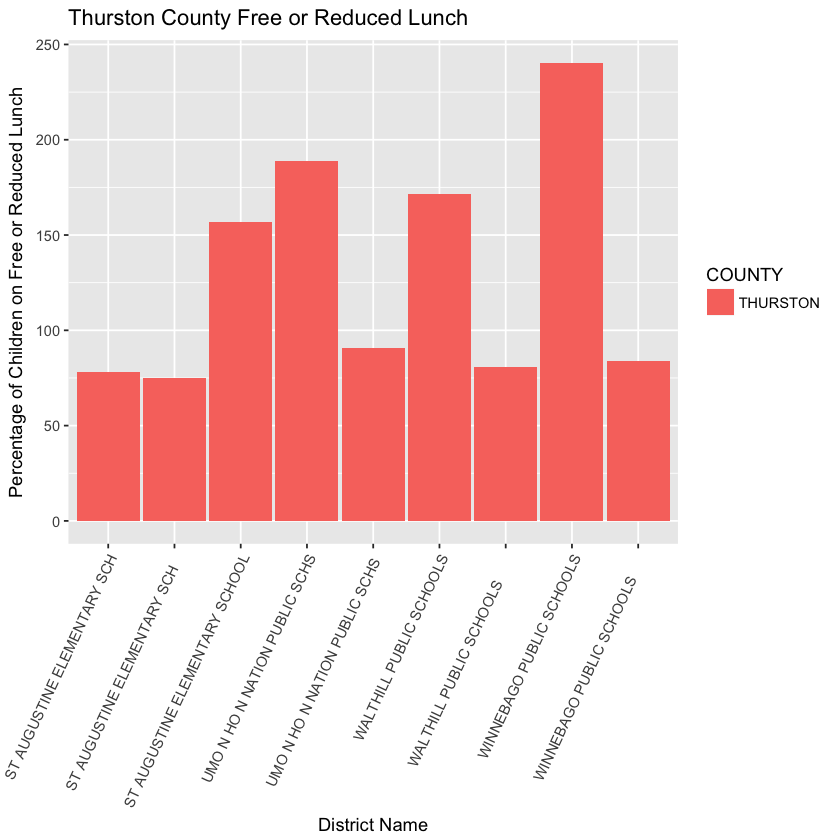

In [125]:
ggplot(lthu, aes(DISTRICTLNAME, weight=PERCENT, fill=COUNTY)) + geom_bar(width = 0.95) + theme(axis.text.x = element_text(angle = 65, hjust = 1)) + labs(title= "Thurston County Free or Reduced Lunch", x= "District Name", y = "Percentage of Children on Free or Reduced Lunch" )

Thurston County incompasses the Omaha Reservation and is home to around 5,000 Native Americans from the Ho-Chunk and Winnebago tribes.  Commonly overlooked Thurston accounts for a large portion of Nebraska's free and reduced lunch percentage and is one of few counties almost entirely made up of a single origen minority. As a whole Thurston is made up of aroud 7,000 people with 5,000 of those citizens being Native Nebraska Tribal memebers. 
#### _Geographical Importance:_ ####
Because Thurston is a primarily Native community the chances of being born into the free and reduced lunch system are extremly high soley on the geographical location of the county.  Because of the counties location, Thurston is almost entirely the Omaha Reservation, a community with high levels of poverty which create barriers to educational success. This systematic poverty has caused a lack of educational advancements leading to low paying jobs, and an increasing rate of children dependent on the free and reduced lunch system.

### Conclusion ###

While these three counties may seem unrelated from a distance they are home to three major manority groups in Nebraska all affected by government funding and the geographical location they are born into. Counties such as Hall and Douglas with larger amounts of unregistered citizens dependent on government assistance through their tax dollars may see a rise in financial hardship if the suggested census edits were to go into effect. Because the state and national data can be confusing in its breakdown its hard to say at a quick assesment just how significantly budges changes will effect the counties in question. The overall theme you can pull from this breif overview however is the significants of government assistance. While Thurston county may not be directly effected by the census adjustments it has been growingly affected by lack of attention and financial assistance given for education creating systematic poverty within native communities. Children in both the impoverished area of Douglas county and Thurston are not given the same oppertunity as those in more well to do communities and are not compensated to offset this inequality. Often times when discussing educational funding our government and voters pay more attention to the personal effects of their decisions and not the overall affect on those whom directly beneifit from the funding.  If you broke down data, even as simply as just demonstrated you are able to see on a larger scale just how much dollar signs effect children's lives.